In [23]:
import numpy as np
import pandas as pd
import mne

In [24]:
data = mne.io.read_raw_edf('eeg10.edf', preload=True)

Extracting EDF parameters from /home/anjali/Desktop/Mehnat/BTP2/eeg10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1389311  =      0.000 ...  5426.996 secs...


In [25]:
df = data.to_data_frame()
type(df)

Converting "time" to "<class 'numpy.int64'>"...


pandas.core.frame.DataFrame

In [28]:
df_np = data[:][0]
df_np.shape

(21, 1389312)

In [29]:
C = np.fft.fftn(df_np)
sum(C[0:10]).shape

(1389312,)

In [30]:
np.fft.fftn(df_np).shape

(21, 1389312)

In [36]:
# import matplotlib.pyplot as plt
# import math
# Fs=256
# N= df_np.shape[1]
# xdft = np.fft.fftn(df_np)
# xdft = xdft[1 : (int)(N/2)+1];
# xdft = abs(xdft)
# psdx = (1/(Fs*N)) * xdft * xdft;
# psdx[2:N-1] = 2 * psdx[2:N-1];
# freq = range(0, int(Fs/N), int(Fs/2));
# # plt.plot(freq, 10*math.log10(psdx))
# xdft.shape

In [43]:
# df = df_np[:,:(20*256)]
df = df_np
df.shape
df.shape[1]

a = np.zeros(shape=(5,2))
a[2][1] = 5
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  5.],
       [ 0.,  0.],
       [ 0.,  0.]])

(21, 694657)
2538.8377089
45.2585778424
20.7657910129
11.5790214503
3.09981760296


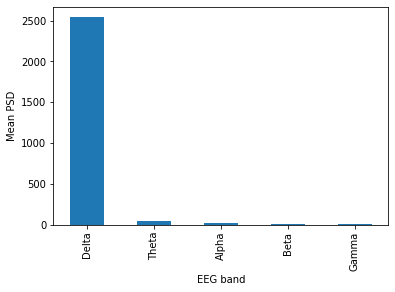

In [47]:
import numpy as np

fs = 256                                
data = df_np 
N = data.shape[1] # total num of points = 1389312

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))

# FORMULA from some online post
# psd_vals = (1/(fs*N)) * xdft * xdft;

n_rows = fft_vals.shape[0]
n_cols = fft_vals.shape[1]
psd_vals = np.zeros(shape=(n_rows, n_cols))

for i in range(n_rows):
    for j in range(n_cols):
        psd_vals[i][j] = (N/fs) * fft_vals[i][j] * fft_vals[i][j];

print(psd_vals.shape)

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(data.shape[1], 1.0/fs)

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(psd_vals[:,freq_ix])

# Plot the data (using pandas here cause it's easy)
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean PSD")

for band in eeg_bands:
    print(eeg_band_fft[band])